In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3555, 18)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 11,1.80,8079.0,8.0,5.0,2,1.0,Moderately Old,2476.0,0,0,0,0,0,0,0
1,house,vipul world,sector 48,3.35,5583.0,6.0,5.0,3+,3.0,Moderately Old,6000.0,0,0,0,0,0,0,53
2,flat,parsvnath exotica,sector 53,4.80,14679.0,3.0,4.0,3+,12.0,New Property,2895.0,0,0,0,0,0,0,69
3,flat,signature global the millennia 3,sector 37d,0.45,7627.0,2.0,3.0,2,8.0,Relatively New,656.0,0,0,0,0,0,0,8
4,house,spaze privy,sector 72,3.10,8486.0,5.0,5.0,3+,21.0,Relatively New,3653.0,0,0,0,0,0,0,0


In [6]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,sector 11,1.80,8.0,5.0,2,1.0,Moderately Old,2476.0,0,0,0,0,0,0,0
1,house,sector 48,3.35,6.0,5.0,3+,3.0,Moderately Old,6000.0,0,0,0,0,0,0,53
2,flat,sector 53,4.80,3.0,4.0,3+,12.0,New Property,2895.0,0,0,0,0,0,0,69
3,flat,sector 37d,0.45,2.0,3.0,2,8.0,Relatively New,656.0,0,0,0,0,0,0,8
4,house,sector 72,3.10,5.0,5.0,3+,21.0,Relatively New,3653.0,0,0,0,0,0,0,0


# luxury score
#### converting the luxury column to categorical column

<Axes: ylabel='luxury_score'>

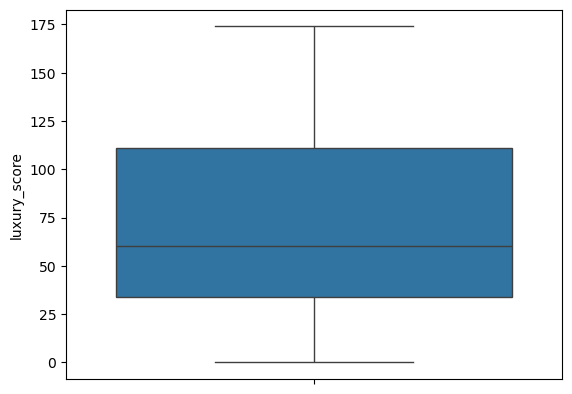

In [8]:
sns.boxplot(df['luxury_score'])

In [9]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [10]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [11]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,house,sector 11,1.80,8.0,5.0,2,1.0,Moderately Old,2476.0,0,0,0,0,0,0,0,Low
1,house,sector 48,3.35,6.0,5.0,3+,3.0,Moderately Old,6000.0,0,0,0,0,0,0,53,Medium
2,flat,sector 53,4.80,3.0,4.0,3+,12.0,New Property,2895.0,0,0,0,0,0,0,69,Medium
3,flat,sector 37d,0.45,2.0,3.0,2,8.0,Relatively New,656.0,0,0,0,0,0,0,8,Low
4,house,sector 72,3.10,5.0,5.0,3+,21.0,Relatively New,3653.0,0,0,0,0,0,0,0,Low


# floorNum
##### converting floor num to categorical column

<Axes: ylabel='floorNum'>

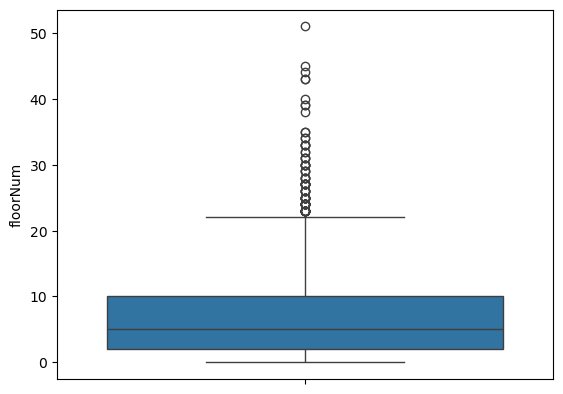

In [12]:
sns.boxplot(df['floorNum'])

In [13]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [14]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [15]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,house,sector 11,1.80,8.0,5.0,2,1.0,Moderately Old,2476.0,0,0,0,0,0,0,0,Low,Low Floor
1,house,sector 48,3.35,6.0,5.0,3+,3.0,Moderately Old,6000.0,0,0,0,0,0,0,53,Medium,Mid Floor
2,flat,sector 53,4.80,3.0,4.0,3+,12.0,New Property,2895.0,0,0,0,0,0,0,69,Medium,High Floor
3,flat,sector 37d,0.45,2.0,3.0,2,8.0,Relatively New,656.0,0,0,0,0,0,0,8,Low,Mid Floor
4,house,sector 72,3.10,5.0,5.0,3+,21.0,Relatively New,3653.0,0,0,0,0,0,0,0,Low,High Floor


In [16]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [17]:
train_df.head()


,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,house,sector 11,1.80,8.0,5.0,2,Moderately Old,2476.0,0,0,0,0,0,0,Low,Low Floor
1,house,sector 48,3.35,6.0,5.0,3+,Moderately Old,6000.0,0,0,0,0,0,0,Medium,Mid Floor
2,flat,sector 53,4.80,3.0,4.0,3+,New Property,2895.0,0,0,0,0,0,0,Medium,High Floor
3,flat,sector 37d,0.45,2.0,3.0,2,Relatively New,656.0,0,0,0,0,0,0,Low,Mid Floor
4,house,sector 72,3.10,5.0,5.0,3+,Relatively New,3653.0,0,0,0,0,0,0,Low,High Floor


In [18]:
# as we know machine learning models do not work on categorical colums so we will convert our categorical columns to numerical numbers
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37c', 'sector 37d',
       'sector 38', 'sector 39', 'sector 4', 'sector 40', 'sector 41',
       'sector 43', 'sector 45', 'sector 46', 'sector 47', 'sector 48',
       'sector 49', 'sector 5', 'sector 50', 'sector 51', 'sector 52',
       'sector 53', 'sect

In [19]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,1.0,15.0,8.0,5.0,2.0,0.0,2476.0,0,0,0,0,0,0,1.0,1.0
1,1.0,55.0,6.0,5.0,4.0,0.0,6000.0,0,0,0,0,0,0,2.0,2.0
2,0.0,61.0,3.0,4.0,4.0,1.0,2895.0,0,0,0,0,0,0,2.0,0.0
3,0.0,45.0,2.0,3.0,2.0,3.0,656.0,0,0,0,0,0,0,1.0,2.0
4,1.0,84.0,5.0,5.0,4.0,3.0,3653.0,0,0,0,0,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3550,0.0,64.0,4.0,4.0,4.0,2.0,2600.0,0,0,1,0,0,2,2.0,2.0
3551,0.0,94.0,2.0,2.0,2.0,3.0,1176.0,0,0,0,0,0,2,2.0,0.0
3552,0.0,62.0,4.0,6.0,3.0,3.0,2826.0,0,1,0,0,0,1,2.0,2.0
3553,0.0,64.0,3.0,2.0,3.0,2.0,1585.0,0,0,1,0,0,0,2.0,2.0


In [20]:
y_label

0        1.80
1        3.35
2        4.80
3        0.45
4        3.10
        ...  
3550     2.05
3551     0.81
3552    11.00
3553     1.70
3554     0.90
Name: price, Length: 3555, dtype: float64

# Technique 1 - Correlation Analysis

<Axes: >

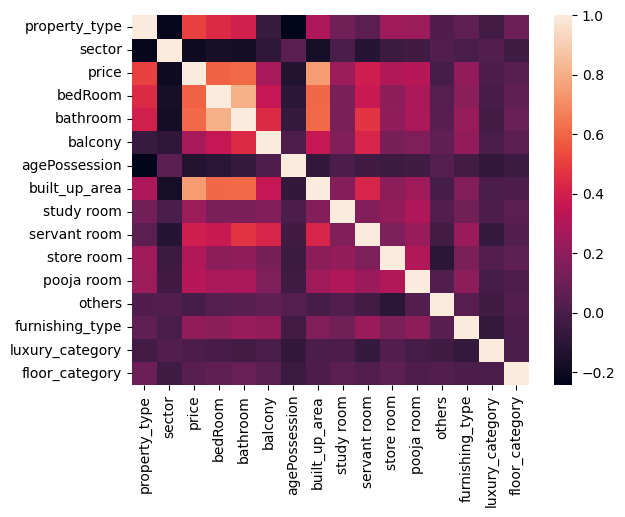

In [21]:
sns.heatmap(data_label_encoded.corr())

In [22]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.199708
1,price,1.000000
2,bedRoom,0.591242
3,bathroom,0.609810
4,balcony,0.269494
5,agePossession,-0.130714
6,built_up_area,0.748565
7,study room,0.242848
8,servant room,0.391745
9,store room,0.305599


# Technique 2 - Random Forest Feature Importance

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.648956
0,property_type,0.102177
1,sector,0.101975
2,bedRoom,0.025416
3,bathroom,0.025209
8,servant room,0.020003
5,agePossession,0.013646
4,balcony,0.013326
7,study room,0.010233
9,store room,0.010000


# Technique 3 - Gradient Boosting Feature importances

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.680931
1,sector,0.103177
0,property_type,0.099917
3,bathroom,0.035466
2,bedRoom,0.035158
8,servant room,0.026554
9,store room,0.006977
7,study room,0.003470
5,agePossession,0.003329
4,balcony,0.002015


# Technique 4 - Permutation Importance

In [25]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.694729
0,property_type,0.153467
1,sector,0.122356
8,servant room,0.011563
4,balcony,0.003658
3,bathroom,0.003309
7,study room,0.001751
11,others,0.000536
14,floor_category,0.000026
9,store room,-0.000356


# Technique 5 - LASSO

In [26]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
6,built_up_area,1.511095
0,property_type,0.706615
3,bathroom,0.282468
9,store room,0.199589
7,study room,0.176094
8,servant room,0.166194
12,furnishing_type,0.136638
10,pooja room,0.075063
13,luxury_category,0.048973
2,bedRoom,0.017283


# Technique 6 - RFE

In [27]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.646992
1,sector,0.108141
0,property_type,0.104127
2,bedRoom,0.027141
3,bathroom,0.022699
8,servant room,0.019403
5,agePossession,0.013094
4,balcony,0.012897
7,study room,0.008812
13,luxury_category,0.007303


# Technique 7 - Linear Regression Weights

In [29]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
6,built_up_area,1.513459
0,property_type,0.704010
3,bathroom,0.290005
9,store room,0.204069
7,study room,0.184659
8,servant room,0.175133
12,furnishing_type,0.145803
10,pooja room,0.078193
13,luxury_category,0.059586
2,bedRoom,0.019911


# Technique 8 - SHAP

In [30]:
!pip install shap

   ---------------------------------------- 0.0/545.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.1 kB ? eta -:--:--
   ---------------------------------------- 545.1/545.1 kB 3.7 MB/s eta 0:00:00

   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   ---------------------------------------- 2/2 [shap]



In [31]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[ 0.72594012, -0.6707502 , -0.05414717, ..., -0.06235771,
        -0.04994956, -0.04963521],
       [ 0.86929988,  0.04854094,  0.14257977, ...,  0.05686308,
        -0.05338692,  0.00874018],
       [-0.63966729,  0.93946423,  0.00434819, ...,  0.04701457,
         0.00249814,  0.07679393],
       ...,
       [-0.22997391,  1.87701674,  0.04766402, ...,  0.11481834,
        -0.02798246, -0.00883637],
       [-0.24370446,  0.3724428 , -0.01490181, ...,  0.00901176,
        -0.01719203, -0.01665822],
       [-0.33456243, -0.61262846, -0.03009404, ..., -0.02325313,
        -0.02762899,  0.02212417]])

In [32]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.249320
0,property_type,0.467631
1,sector,0.384471
3,bathroom,0.112732
8,servant room,0.096468
2,bedRoom,0.056386
4,balcony,0.040884
5,agePossession,0.024605
14,floor_category,0.023180
12,furnishing_type,0.020682


In [33]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [34]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.199708,0.101975,0.103177,0.122356,-0.048779,0.108141,-0.057777,0.384471
bedRoom,0.591242,0.025416,0.035158,-0.011905,0.017283,0.027141,0.019911,0.056386
bathroom,0.609810,0.025209,0.035466,0.003309,0.282468,0.022699,0.290005,0.112732
balcony,0.269494,0.013326,0.002015,0.003658,-0.045416,0.012897,-0.068543,0.040884
agePossession,-0.130714,0.013646,0.003329,-0.002909,-0.023810,0.013094,-0.031447,0.024605
built_up_area,0.748565,0.648956,0.680931,0.694729,1.511095,0.646992,1.513459,1.249320
study room,0.242848,0.010233,0.003470,0.001751,0.176094,0.008812,0.184659,0.020397
servant room,0.391745,0.020003,0.026554,0.011563,0.166194,0.019403,0.175133,0.096468
store room,0.305599,0.010000,0.006977,-0.000356,0.199589,0.007262,0.204069,0.018455


In [35]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [36]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.731016
sector             0.136792
bathroom           0.030213
servant room       0.026801
bedRoom            0.022030
balcony            0.011124
agePossession      0.008354
study room         0.007409
store room         0.007086
floor_category     0.005256
luxury_category    0.004455
furnishing_type    0.004090
pooja room         0.003176
others             0.002199
dtype: float64

In [38]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [39]:
scores.mean()

np.float64(0.7941647943330581)

In [41]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [42]:
scores.mean()


np.float64(0.7917172717920925)

In [43]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [46]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [47]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,1.0,15.0,8.0,5.0,2.0,0.0,2476.0,0,0,0,1.0,1.0,1.80
1,1.0,55.0,6.0,5.0,4.0,0.0,6000.0,0,0,0,2.0,2.0,3.35
2,0.0,61.0,3.0,4.0,4.0,1.0,2895.0,0,0,0,2.0,0.0,4.80
3,0.0,45.0,2.0,3.0,2.0,3.0,656.0,0,0,0,1.0,2.0,0.45
4,1.0,84.0,5.0,5.0,4.0,3.0,3653.0,0,0,0,1.0,0.0,3.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3550,0.0,64.0,4.0,4.0,4.0,2.0,2600.0,0,1,2,2.0,2.0,2.05
3551,0.0,94.0,2.0,2.0,2.0,3.0,1176.0,0,0,2,2.0,0.0,0.81
3552,0.0,62.0,4.0,6.0,3.0,3.0,2826.0,1,0,1,2.0,2.0,11.00
3553,0.0,64.0,3.0,2.0,3.0,2.0,1585.0,0,1,0,2.0,2.0,1.70


In [ ]:
a